In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import json
import numpy as np
import requests
#from config import g_key
eia="5f37c0ee03a8d0b528f90c73b145f8b4"
#testing conflicts

In [2]:
df=pd.DataFrame(pd.read_csv("cleaned_data.csv"))

In [3]:
states_df=pd.DataFrame(pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv"))
states_df.head()
states=states_df["usa_state"].tolist()
states_df

,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California
5,CO,39.550051,-105.782067,Colorado
6,CT,41.603221,-73.087749,Connecticut
7,DC,38.905985,-77.033418,District of Columbia
8,DE,38.910832,-75.527670,Delaware
9,FL,27.664827,-81.515754,Florida


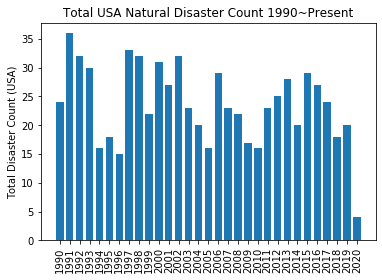

In [4]:
df.head()
by_year_df=df.groupby("Year")
by_year_df.count()
year_counts=by_year_df.count()["Disaster Subgroup"].tolist()
years_list=df["Year"].unique().tolist()
plt.bar(range(len(year_counts)),year_counts,width=.75)
tick_locations = [value for value in range(len(year_counts))]
plt.xticks(tick_locations, years_list,rotation=90)
plt.ylabel("Total Disaster Count (USA)")
plt.tick_params(labelsize=10)
plt.title("Total USA Natural Disaster Count 1990~Present")
plt.savefig("Total USA Natural Disaster Count 1990~Present.png")

In [5]:
cs_states=df["Location"].tolist()
test=cs_states[5] #Texas
state_counts=[]
for st in states:
    count=0
    for string in cs_states:
        if str(string).count(st)>0:
            count=count+1
    state_counts.append(count)

In [6]:
states_df["State Counts"]=state_counts
states_df
    

,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state,State Counts
0,AK,63.588753,-154.493062,Alaska,7
1,AL,32.318231,-86.902298,Alabama,106
2,AR,35.201050,-91.831833,Arkansas,103
3,AZ,34.048928,-111.093731,Arizona,27
4,CA,36.778261,-119.417932,California,104
5,CO,39.550051,-105.782067,Colorado,70
6,CT,41.603221,-73.087749,Connecticut,47
7,DC,38.905985,-77.033418,District of Columbia,17
8,DE,38.910832,-75.527670,Delaware,34
9,FL,27.664827,-81.515754,Florida,82


In [ ]:
gmaps.configure(api_key=g_key)
locs=states_df[["usa_state_latitude", "usa_state_longitude"]]
myfig=gmaps.figure()
heatmap = gmaps.heatmap_layer(locs, weights=state_counts, 
                                 dissipating=False,max_intensity=states_df["State Counts"].max()-40,
                                 point_radius=1.5)
myfig.add_layer(heatmap)
myfig

In [ ]:
info_box_template = """
<dl>
<dt>Disaster Count</dt><dd>{State Counts}</dd>
<dt>State</dt><dd>{usa_state}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
state_info = [info_box_template.format(**row) for index, row in states_df.iterrows()]

In [ ]:
marker_layer = gmaps.marker_layer(locs, info_box_content=state_info)
myfig.add_layer(marker_layer)
myfig

In [7]:
url="http://api.eia.gov/series/?api_key={0}&series_id=PET.EMA_EPM0_PTC_S{1}_DPG.A"
#test=requests.get(url.format(eia)).json()
gas_years=np.arange(1984,2020).tolist()
#test["series"][0]["data"][10][1]   example of grabing gas price
req_list=[]
for code in states_df["usa_state_code"]:
    req_list.append(requests.get(url.format(eia,code)).json())

In [92]:

mydict={
    "State":states_df["usa_state"],
    "Price":[],
    "Year":gas_years
}
#tester=pd.DataFrame(mydict)
for num in range(len(req_list)):
    for num1 in range(len(req_list[0]["series"][0]["data"])):
        if req_list[num]["series"][0]["data"][num1][1] is None:
            pass
        else:
            mydict["Price"].append(req_list[num]["series"][0]["data"][num1][1])
len(mydict["Price"])

1350

In [73]:
counter=1
st_codes=states_df["usa_state_code"].tolist()
del st_codes[39]
del st_codes[7]
spliced={
    "AK":[]
}
for code in st_codes:
    for num in mydict["Price"]:
        if code in spliced:
            
    

yay
yay


In [44]:
l=[1,2,3,4]

In [22]:
l.clear()
l

[]

In [110]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
test=list(chunks(mydict["Price"],27))
dates=np.arange(1984,2011).tolist()
tester_df=pd.DataFrame(test,index=st_codes,columns=dates)
tester_df

,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
AK,3.111,2.613,3.390,2.539,2.395,2.091,1.700,1.480,1.287,1.383,...,1.060,1.112,1.039,1.148,0.978,0.949,0.961,0.982,1.009,0.929
AL,2.256,1.826,2.772,2.274,2.076,1.811,1.379,1.070,0.911,0.968,...,0.756,0.791,0.826,0.928,0.809,0.675,0.681,0.664,0.934,0.914
AR,2.249,1.760,2.706,2.307,2.035,1.761,1.352,1.067,0.902,0.958,...,0.731,0.749,0.790,0.874,0.738,0.651,0.661,0.609,0.891,0.893
AZ,2.351,1.907,2.784,2.356,2.191,1.953,1.570,1.312,0.964,1.078,...,0.860,0.834,0.774,0.901,0.771,0.675,0.719,0.681,0.927,0.926
CA,2.537,2.128,2.913,2.493,2.286,1.980,1.653,1.341,1.021,1.155,...,0.813,0.850,0.740,0.898,0.783,0.708,0.689,0.668,0.906,0.926
CO,2.249,1.851,2.768,2.410,2.154,1.861,1.444,1.170,1.009,1.135,...,0.826,0.837,0.801,0.874,0.755,0.657,0.688,0.622,0.943,0.907
CT,2.422,1.943,2.808,2.388,2.205,1.856,1.476,1.180,0.980,1.096,...,0.810,0.856,0.900,0.975,0.859,0.782,0.741,0.707,0.954,0.944
DE,2.313,1.872,2.754,2.274,2.154,1.812,1.432,1.125,0.929,1.006,...,0.729,0.803,0.856,0.935,0.787,0.695,0.682,0.649,0.929,0.906
FL,2.286,1.863,2.767,2.299,2.108,1.821,1.402,1.107,0.933,0.972,...,0.771,0.792,0.823,0.921,0.794,0.710,0.703,0.635,0.930,0.921
GA,2.277,1.851,2.794,2.289,2.095,1.838,1.393,1.080,0.901,0.948,...,0.730,0.766,0.808,0.879,0.754,0.673,0.675,0.642,0.925,0.891
